<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Aging/AgingCountersTestStandUVaBottom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Init and load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import numpy.polynomial.polynomial as poly
import numpy as np
import scipy
from scipy.optimize import curve_fit
import statistics
import math
from datetime import datetime, timedelta
plt.rcParams.update({'figure.max_open_warning': 0})
import itertools as it

MIN_TEMP=21
MAX_TEMP=22

In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=17Yjr34rnNR0GOWfxkGhcwCjZwhnOrDCT

Downloading...
From: https://drive.google.com/uc?id=17Yjr34rnNR0GOWfxkGhcwCjZwhnOrDCT
To: /content/ScanningData_NaturalAgingBottom.txt
100% 3.31M/3.31M [00:00<00:00, 12.5MB/s]


In [3]:
filename = 'ScanningData_NaturalAgingBottom.txt'
with open(filename) as f:
  rows = f.readlines()
  cols = [i for i in range(len(rows[len(rows) - 1].split()))] #this reads the length of the last line and uses that as the number of columns so you don't have to count the number
  data = pd.read_csv(filename, names=cols, sep="\t", header=None, engine='python')
  data[1] = pd.to_datetime(data[1])
  data.set_index(1, inplace=True)

In [4]:
data = data[data.iloc[:, 3:70].gt(0).all(axis=1)]
data.index.names = ['date']
data.drop(0, axis=1, inplace=True)
data.rename({2: 'source'}, axis=1, inplace=True)

column_renames_dict = {}
for col in data.columns[1:].values:
  column_renames_dict[col] = col-3
data.rename(columns=column_renames_dict, inplace=True)
data = data.reset_index()

data.rename({67: 'temp'}, axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
data_signal = data.query('source==1')
data_pedest = data.query('source==0')

In [6]:
def funcC(x, a, b, c): #this is an exponential plus a constant
    return a * np.exp(-b * x) + c
def expo(x, a, b): #this is an exponential
    return a * np.exp(-b * x)
def lin_func(x, a, b): #a linear function
    return a + b * x
def pol0(x, a): #a straight line function
    return a 
def pol2(x, a, b, c): #a second order polynomial
  return (a*x**2) + b*x + c
pd.set_option('max_columns', None)

#Make plots

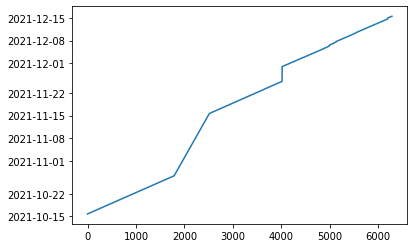

In [7]:
plt.plot(data_signal.index, data_signal.date)

In [8]:
pd.options.mode.chained_assignment = None 
data_ = data_signal.loc[ (data_signal.temp>MIN_TEMP) & (data_signal.temp<MAX_TEMP)  & (data_signal.index>4100)]
X = (data_.date -  data_.date.to_numpy()[0]).astype('timedelta64[h]')/(365*24) #divides days into years

for chan in it.chain(range(0, 12), range(16, 20), range(60,64)):
  pedestal = 0.15
  data_[chan] = data_[chan] - pedestal #subtracts the pedestal value
  max_current = data_[chan][0:100].mean() 
  data_[chan] = data_[chan]/max_current#normalizing

<Figure size 432x288 with 0 Axes>

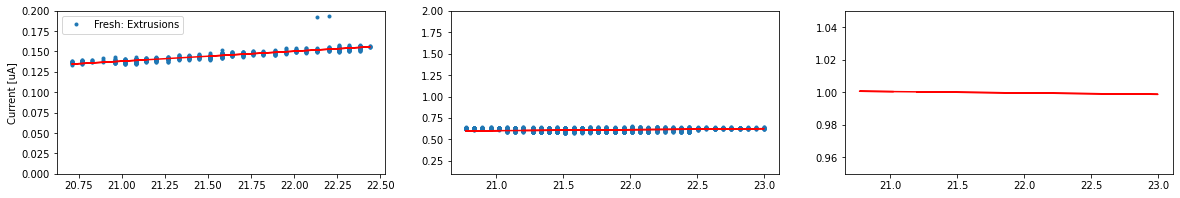

<Figure size 432x288 with 0 Axes>

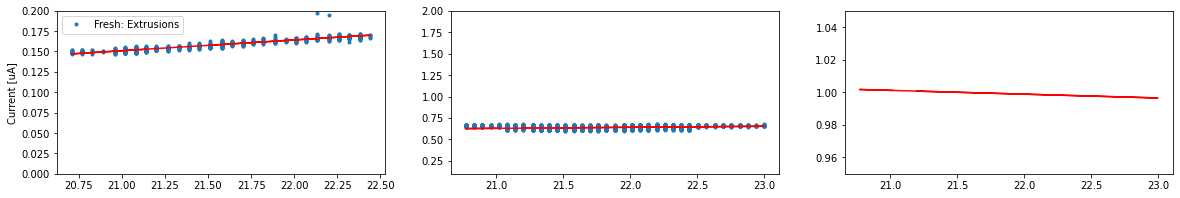

<Figure size 432x288 with 0 Axes>

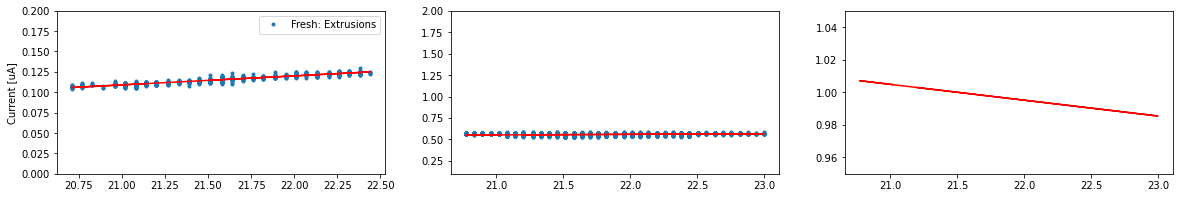

<Figure size 432x288 with 0 Axes>

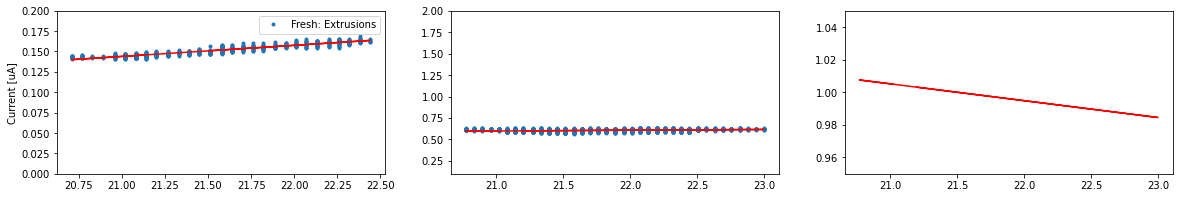

<Figure size 432x288 with 0 Axes>

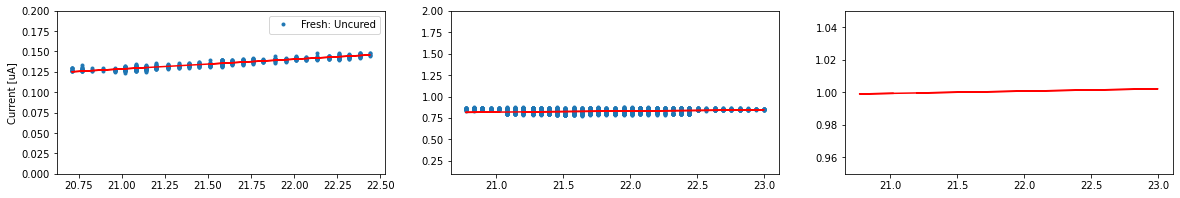

<Figure size 432x288 with 0 Axes>

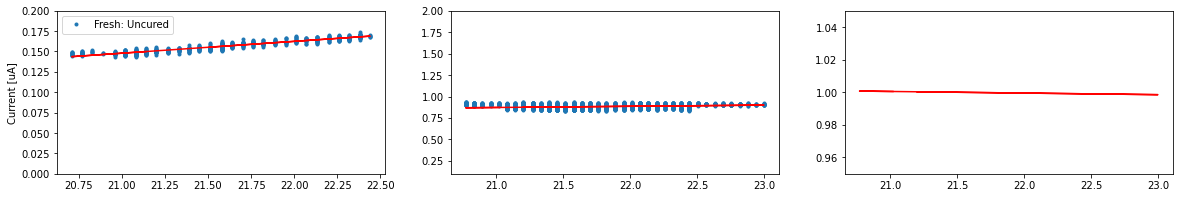

<Figure size 432x288 with 0 Axes>

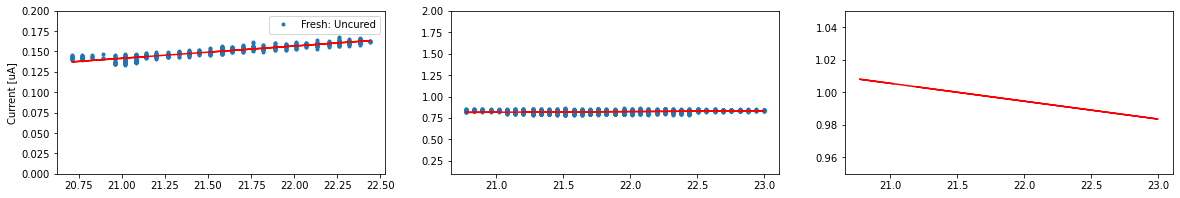

<Figure size 432x288 with 0 Axes>

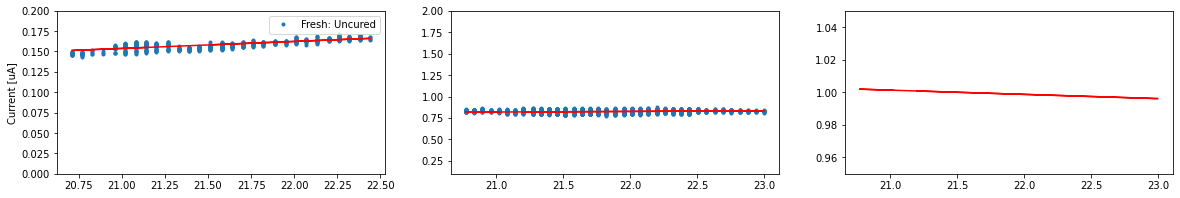

<Figure size 432x288 with 0 Axes>

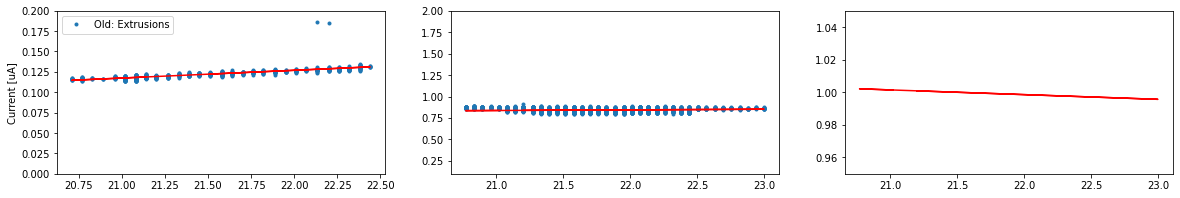

<Figure size 432x288 with 0 Axes>

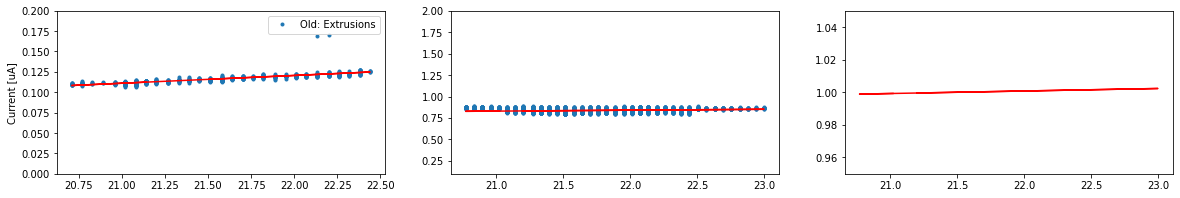

<Figure size 432x288 with 0 Axes>

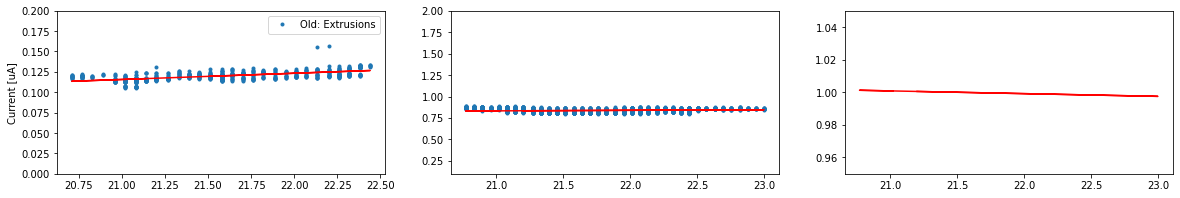

<Figure size 432x288 with 0 Axes>

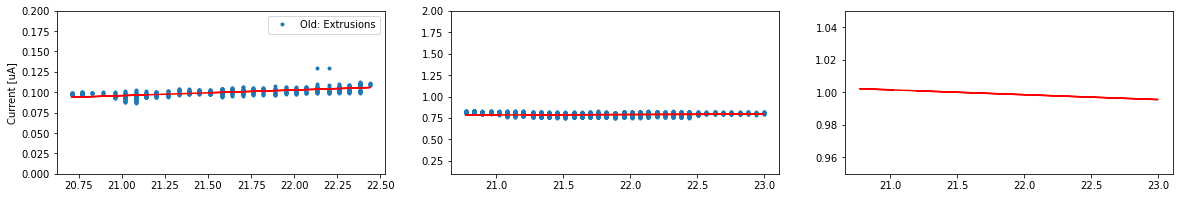

<Figure size 432x288 with 0 Axes>

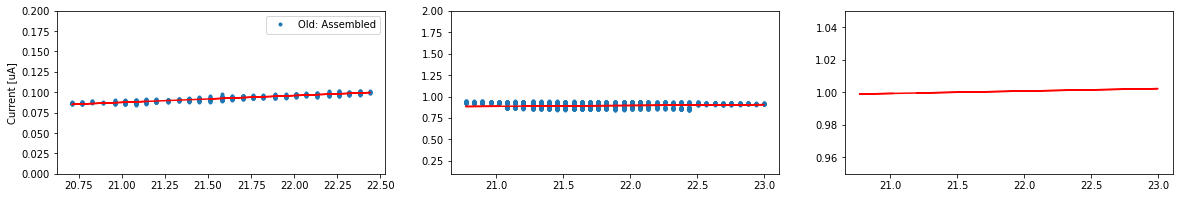

<Figure size 432x288 with 0 Axes>

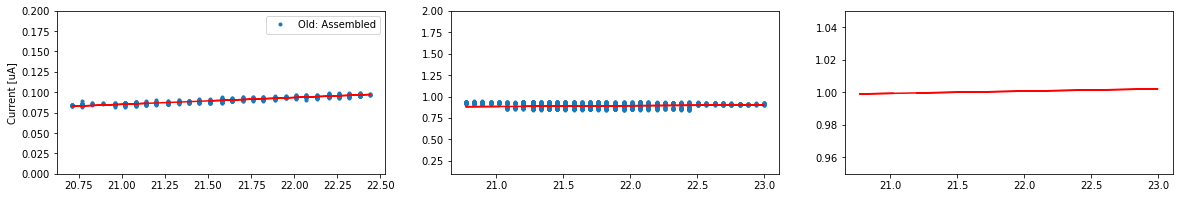

<Figure size 432x288 with 0 Axes>

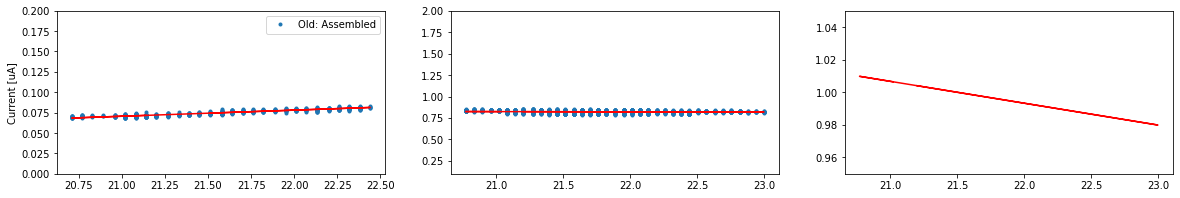

<Figure size 432x288 with 0 Axes>

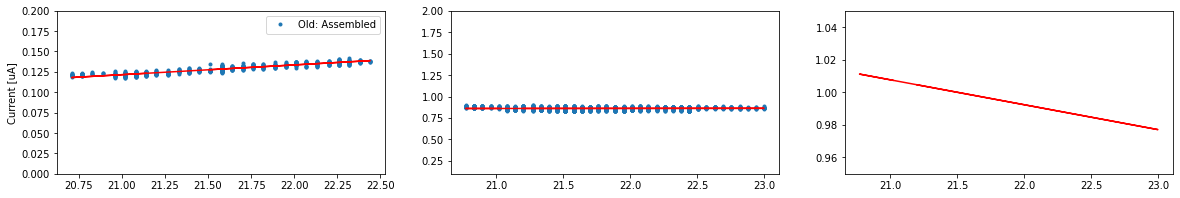

<Figure size 432x288 with 0 Axes>

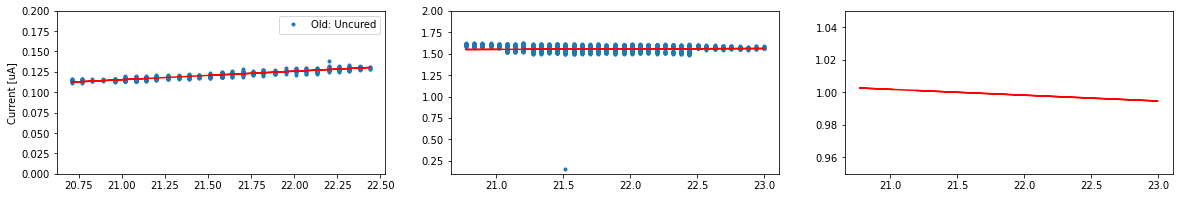

<Figure size 432x288 with 0 Axes>

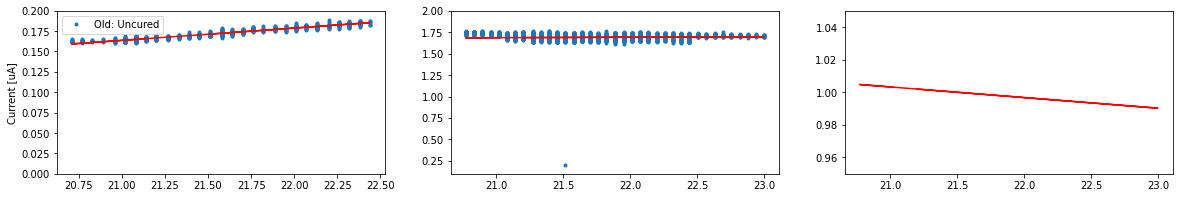

<Figure size 432x288 with 0 Axes>

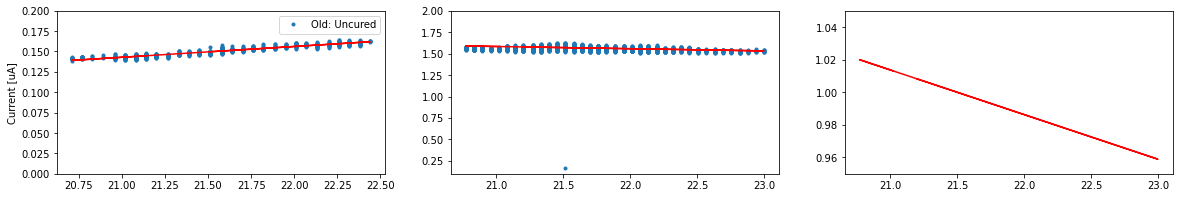

<Figure size 432x288 with 0 Axes>

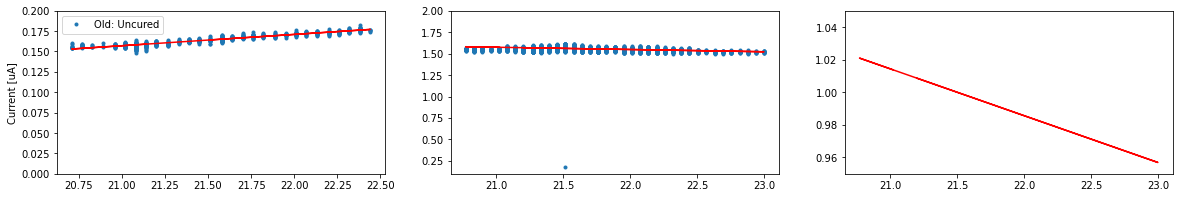

In [9]:
calib_df = pd.DataFrame()

for chan in it.chain(range(0, 12), range(16, 20), range(60,64)):
  plt.figure()

  if chan>=0 and chan<4:
    label='Fresh: Extrusions'
  if chan>=4 and chan<8:
    label='Fresh: Uncured'
  if chan>=8 and chan<12:
    label='Old: Extrusions'
  if chan>=16 and chan<20:
    label='Old: Assembled'
  if chan>=60 and chan<64:
    label='Old: Uncured'

  fig, axs = plt.subplots(1,3, figsize=(20, 3));

  axs[0].plot(data_pedest.temp, data_pedest[chan], '.', label=label);
  popt_ped, pcov = curve_fit(lin_func, data_pedest.temp, data_pedest[chan], p0=(1, 0.05))
  axs[0].plot(data_pedest.temp, lin_func(data_pedest.temp, *popt_ped), 'r-')
  axs[0].set_ylabel('Current [uA]')
  axs[0].set_ylim(0.0, 0.2)
  axs[0].legend()

  axs[1].plot(data_signal.temp, data_signal[chan], '.', label=label);
  popt_sig, pcov = curve_fit(lin_func, data_signal.temp, data_signal[chan], p0=(1, 0.05))
  axs[1].plot(data_signal.temp, lin_func(data_signal.temp, *popt_sig), 'r-')
  axs[1].set_ylim(0.1, 2.)

  FIXED_TEMP = (MAX_TEMP+MIN_TEMP)/2
  SIG_AT_FIXED_TEMP = lin_func(FIXED_TEMP, *(popt_sig-popt_ped))
  axs[2].plot(data_signal.temp, lin_func(data_signal.temp, *(popt_sig-popt_ped))/SIG_AT_FIXED_TEMP, 'r-', label=label)
  axs[2].set_ylim(0.95, 1.05)
  calib_df = calib_df.append({'chan': chan,'name': label, 'const': (popt_sig-popt_ped)[0]/SIG_AT_FIXED_TEMP, 'slope': (popt_sig-popt_ped)[1]/SIG_AT_FIXED_TEMP}, ignore_index=True)

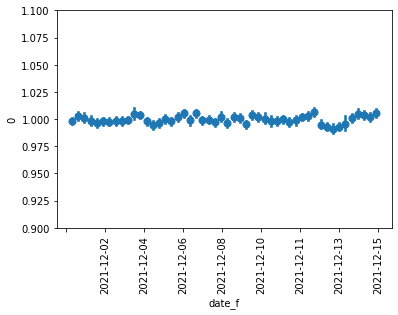

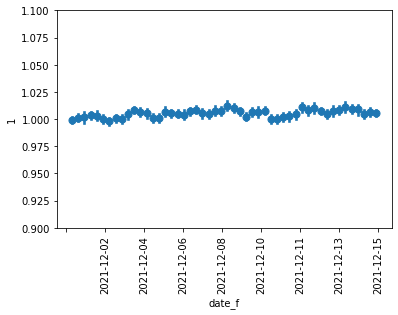

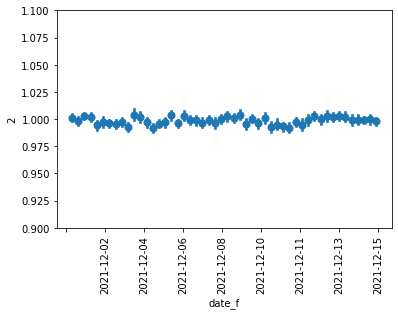

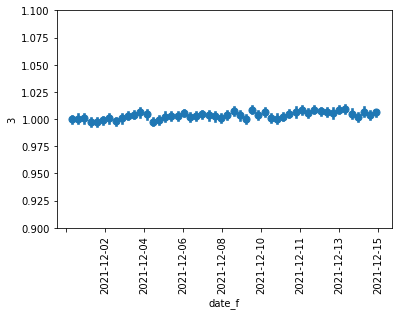

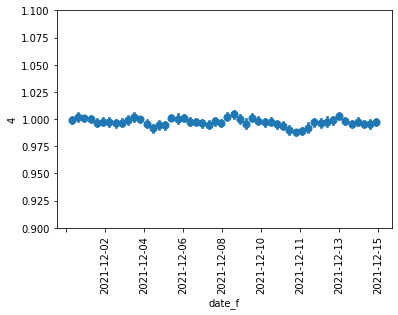

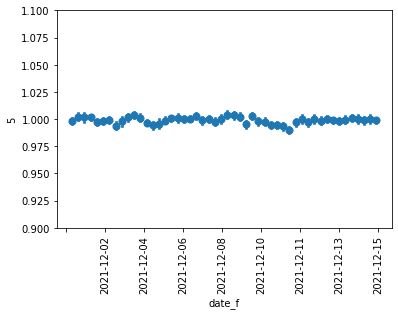

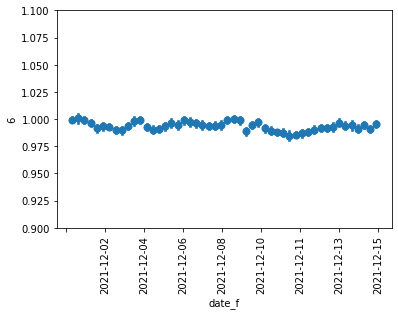

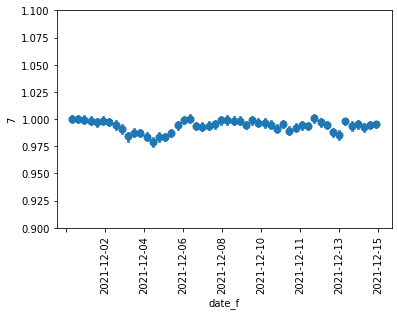

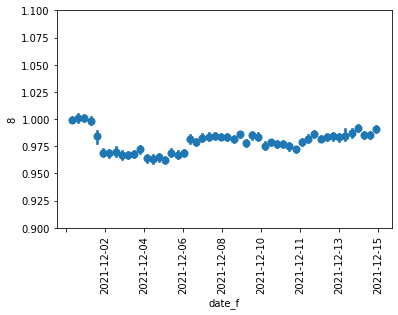

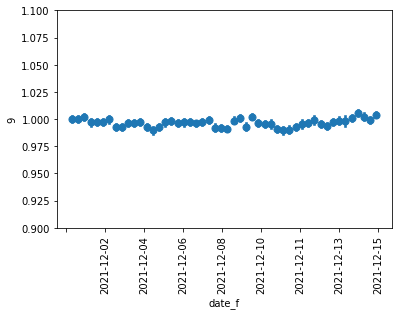

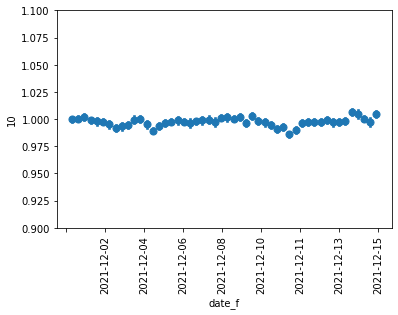

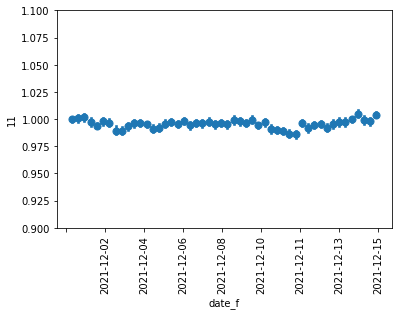

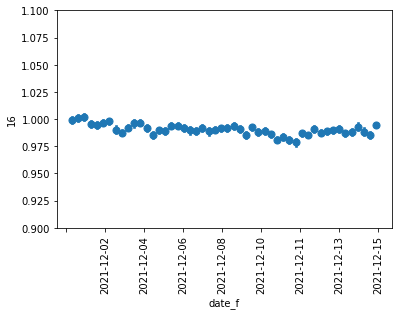

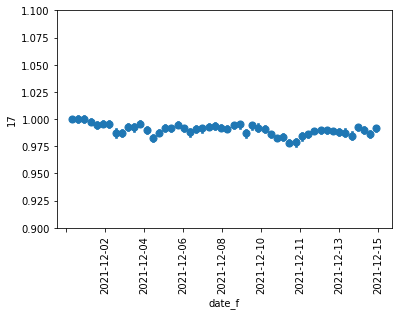

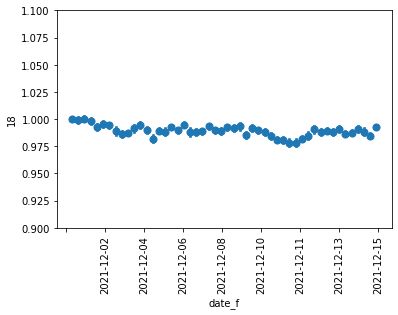

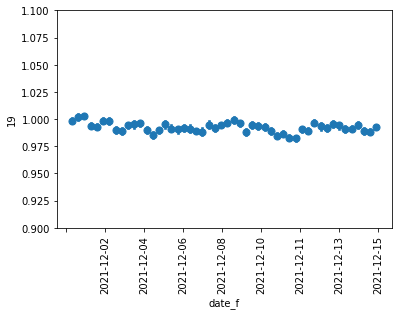

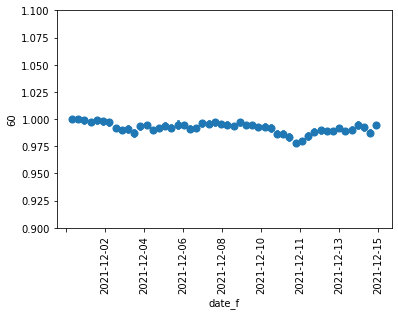

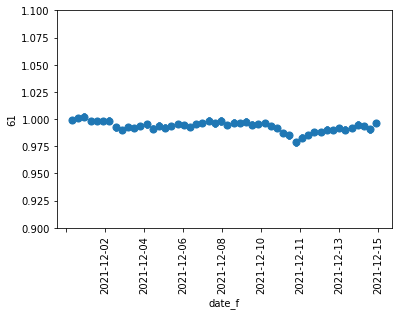

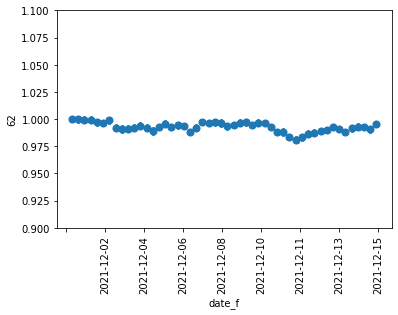

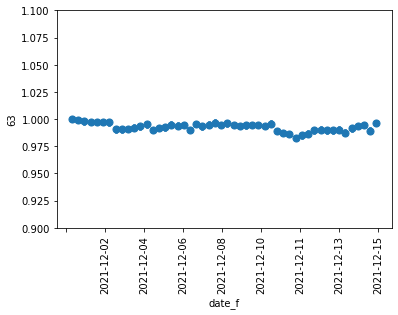

In [10]:
import seaborn as sns

data_['date_f'] = pd.factorize(data_['date'])[0] + 1
mapping = dict(zip(data_['date_f'], data_['date'].dt.date))

for chan in it.chain(range(0, 12), range(16, 20), range(60,64)):

  plt.figure()
  ax = sns.regplot(x=data_['date_f'], y=data_[chan], x_bins=50, fit_reg=None, )
  labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
  ax.set_xticklabels(labels)

  ax.set_ylim(0.9,1.1)
  ax.tick_params(axis='x', labelrotation = 90);


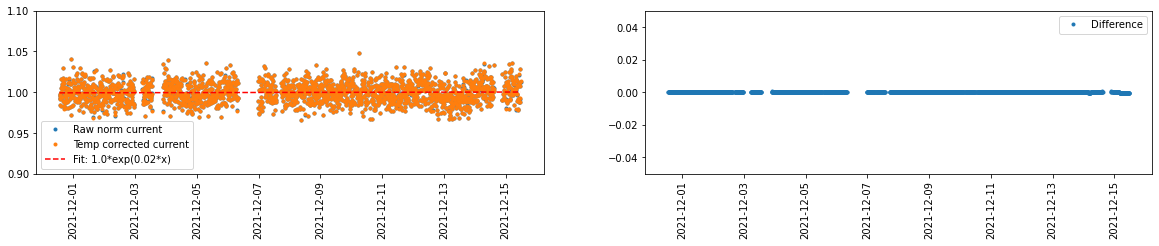

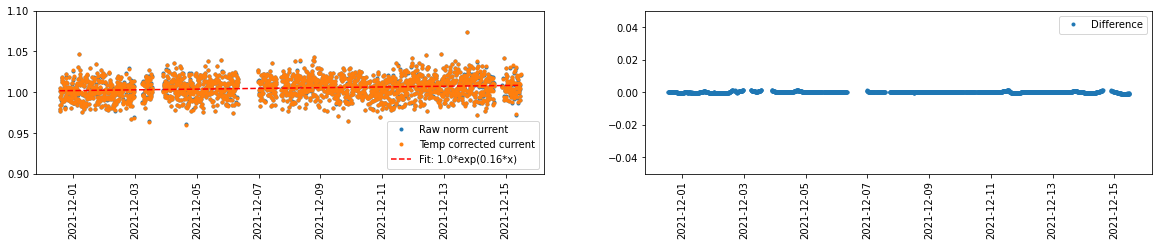

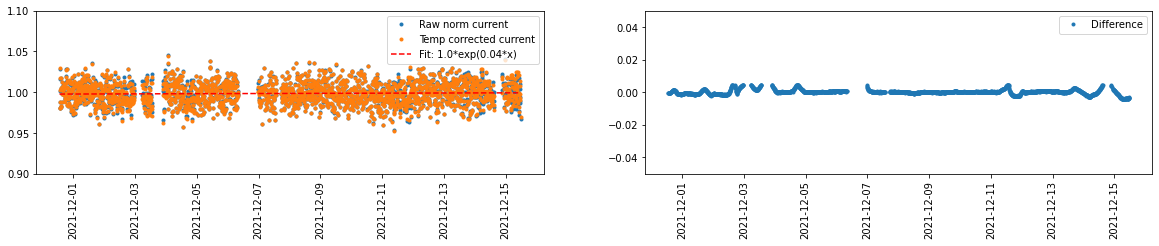

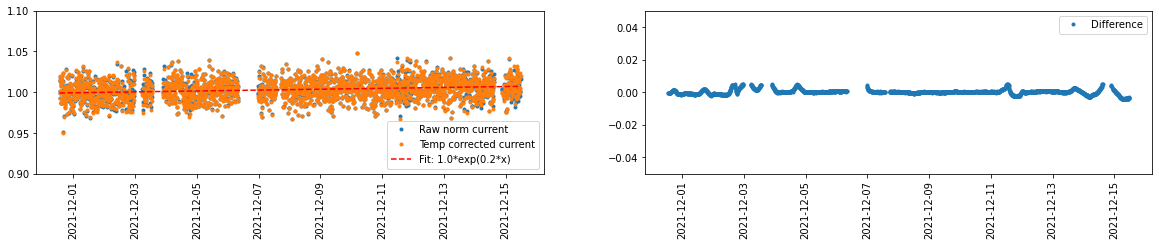

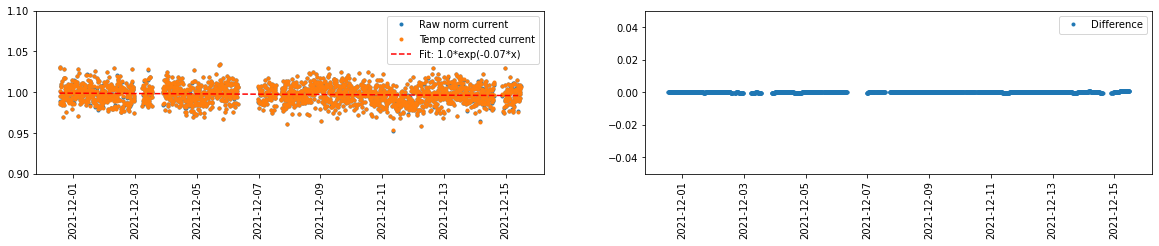

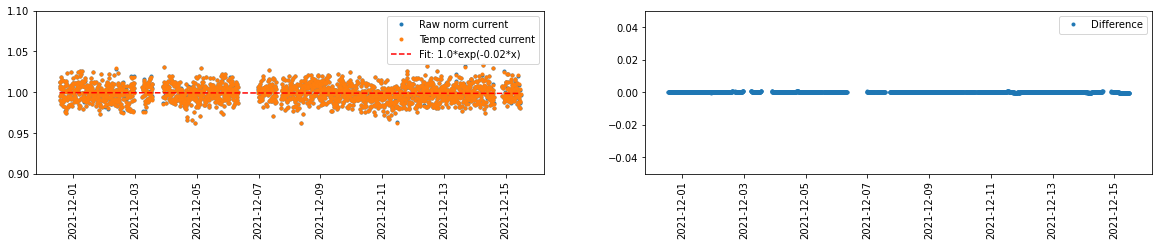

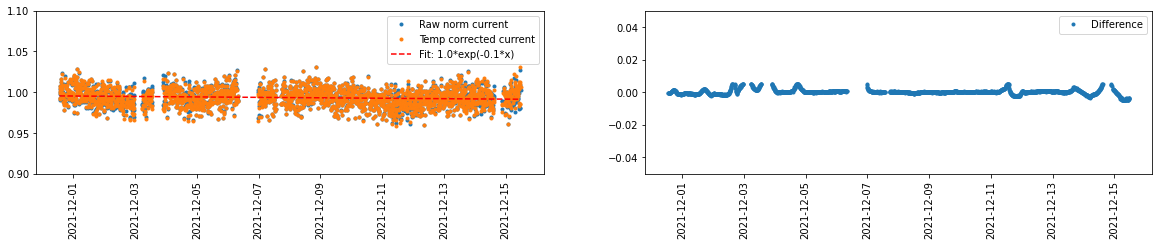

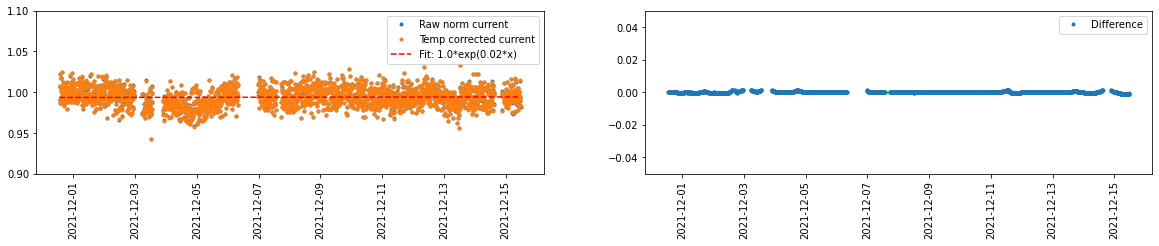

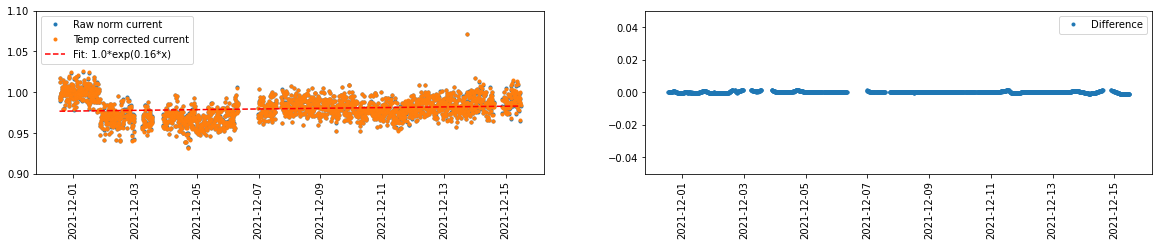

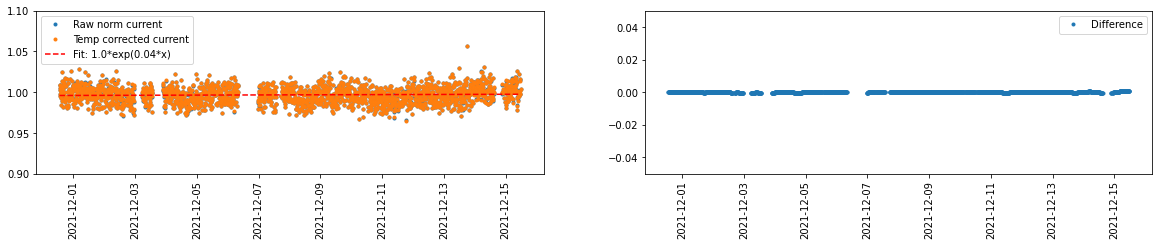

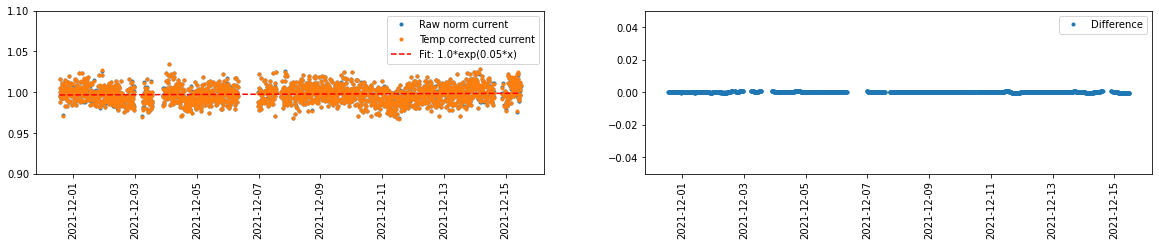

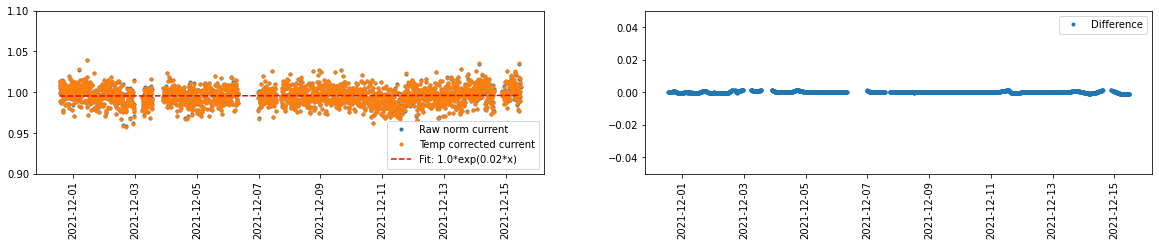

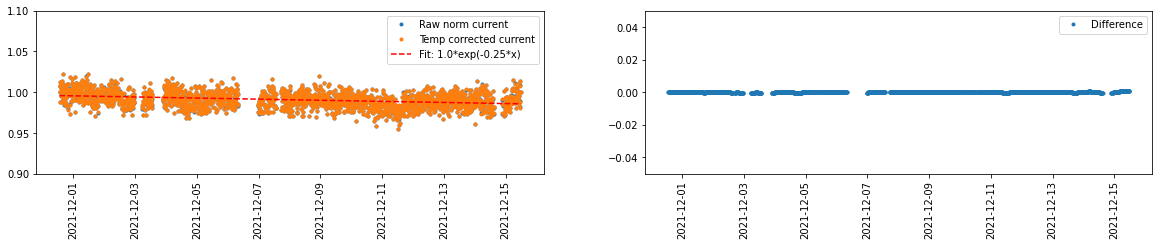

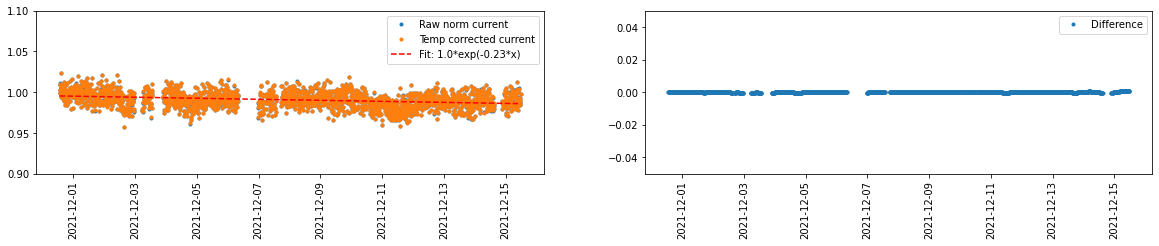

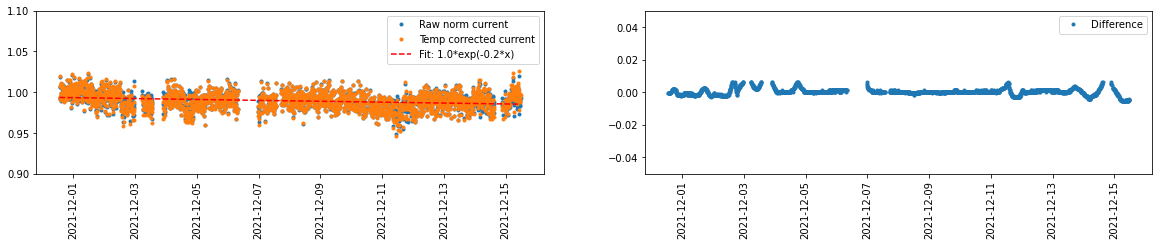

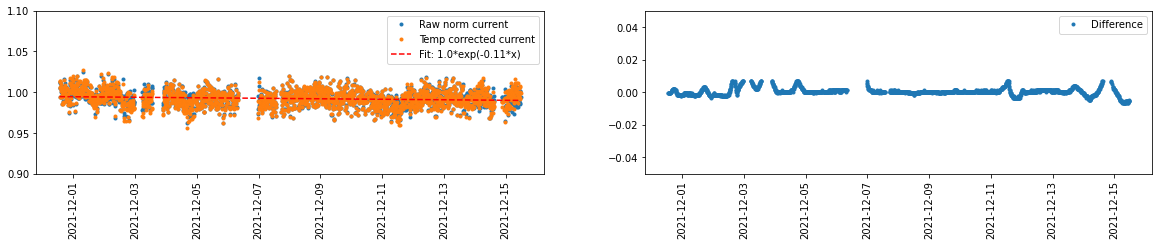

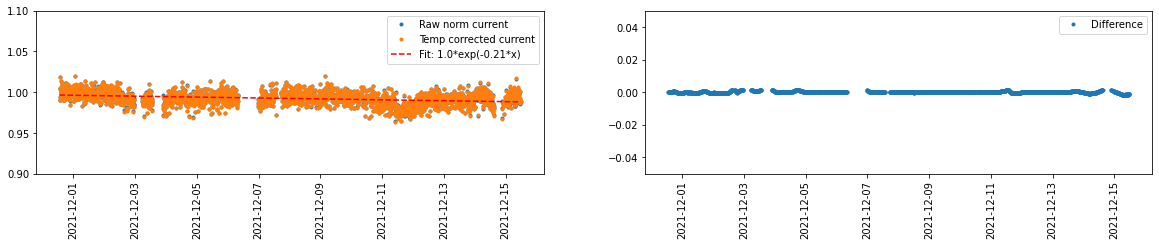

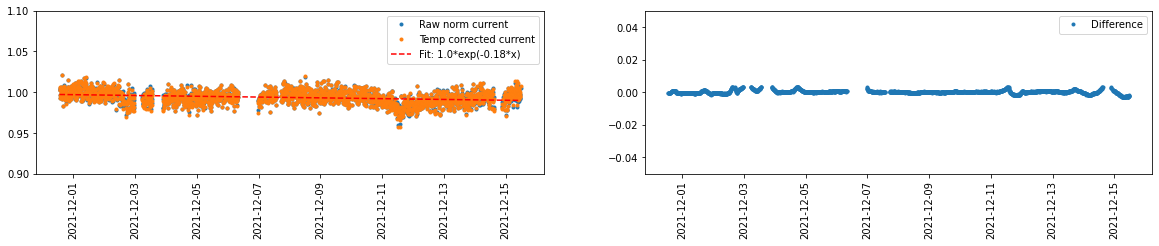

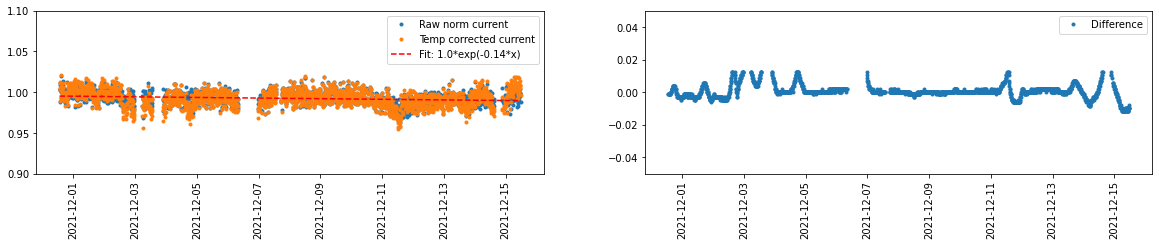

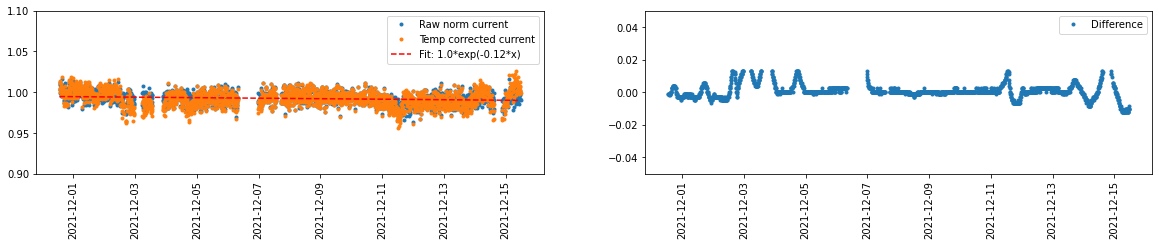

In [11]:
for chan in it.chain(range(0, 12), range(16, 20), range(60,64)):

  fig, axs = plt.subplots(1,2, figsize=(20, 3));
  axs[0].plot(data_.date, data_[chan], '.', label='Raw norm current')

  y =  data_[chan]*(calib_df.query('chan==%d'%chan)['const'].to_numpy() + data_['temp']*calib_df.query('chan==%d'%chan)['slope'].to_numpy())
  axs[0].plot(data_.date, y, '.', label='Temp corrected current')
  axs[0].set_ylim(0.9, 1.1)
  axs[0].tick_params(axis='x', labelrotation = 90);
  popt, pcov = curve_fit(expo, X, y, p0=(1, 0.05))
  axs[0].plot(data_.date, expo(X, *popt), 'r--', label="Fit: " + str(round(popt[0], 1)) + "*exp("+str(-1*round(popt[1],2))+"*x)"); #fits an exponential to the function
  axs[0].legend()


  axs[1].plot(data_.date, data_[chan] - data_[chan]*(calib_df.query('chan==%d'%chan)['const'].to_numpy() + data_['temp']*calib_df.query('chan==%d'%chan)['slope'].to_numpy()), '.', label='Difference')
  axs[1].set_ylim(-0.05, 0.05)
  axs[1].legend()
  axs[1].tick_params(axis='x', labelrotation = 90);


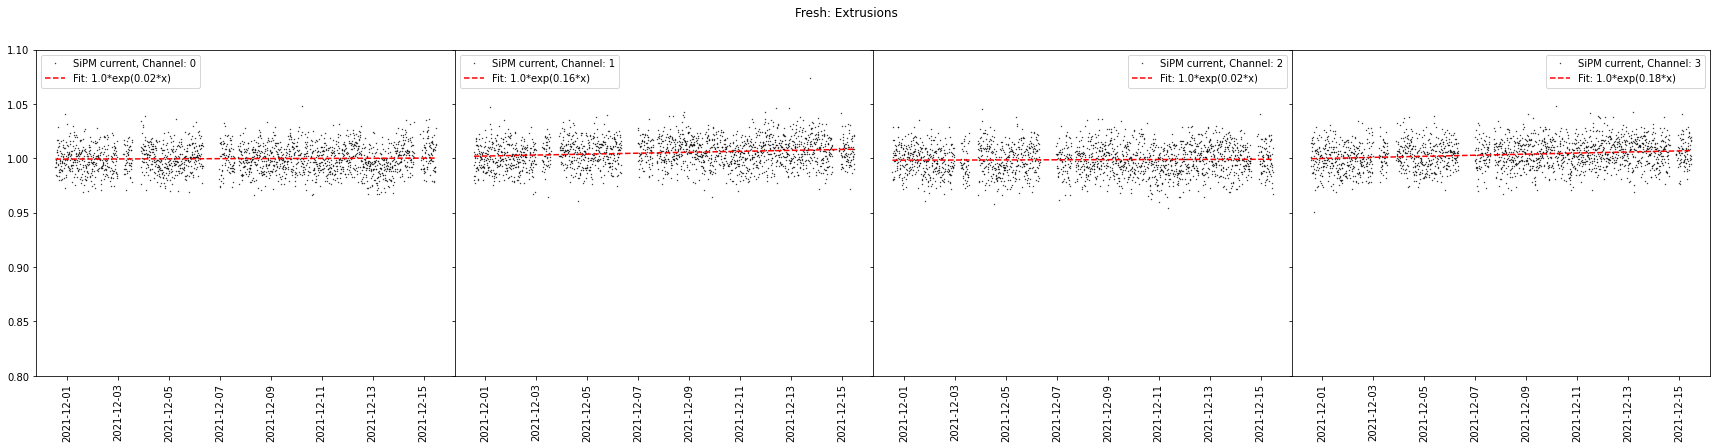

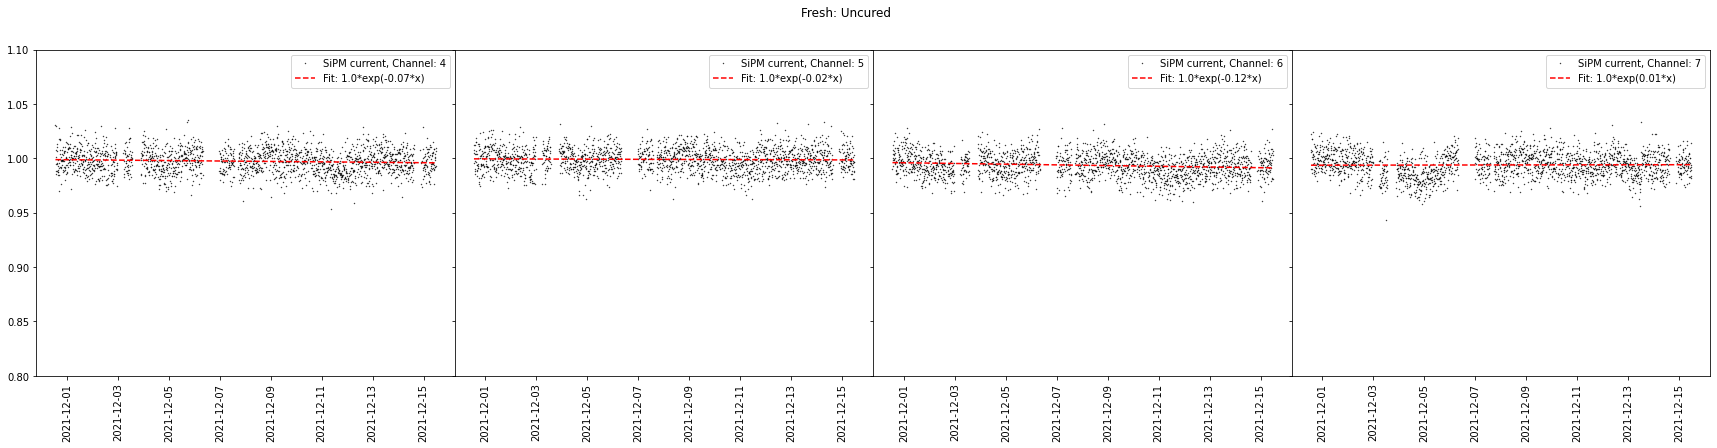

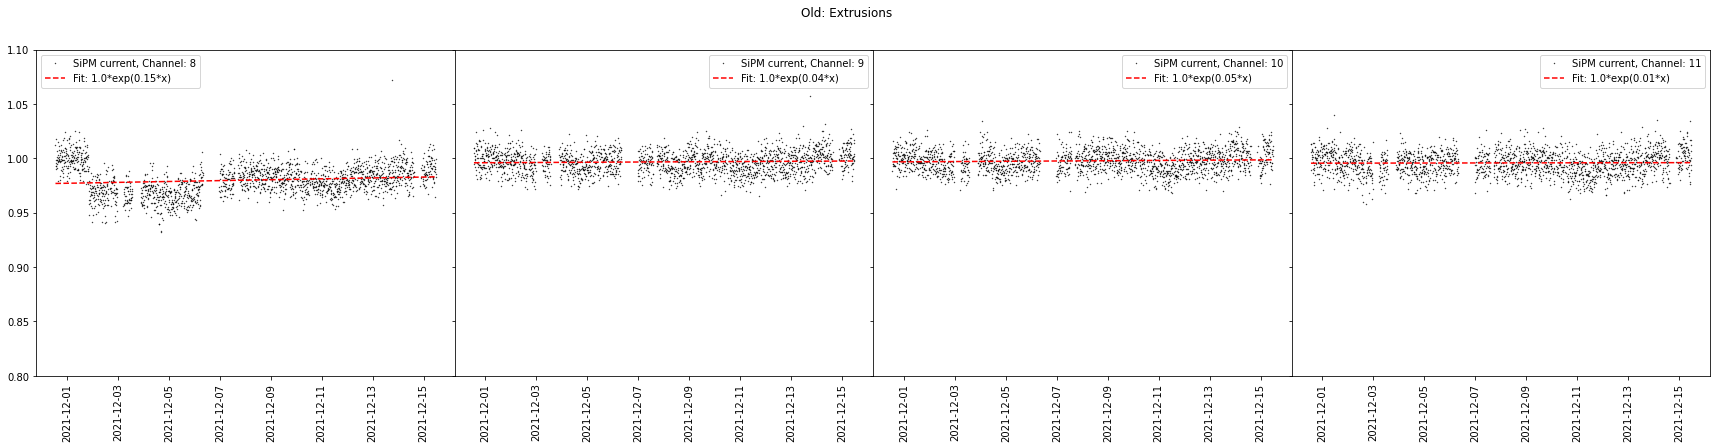

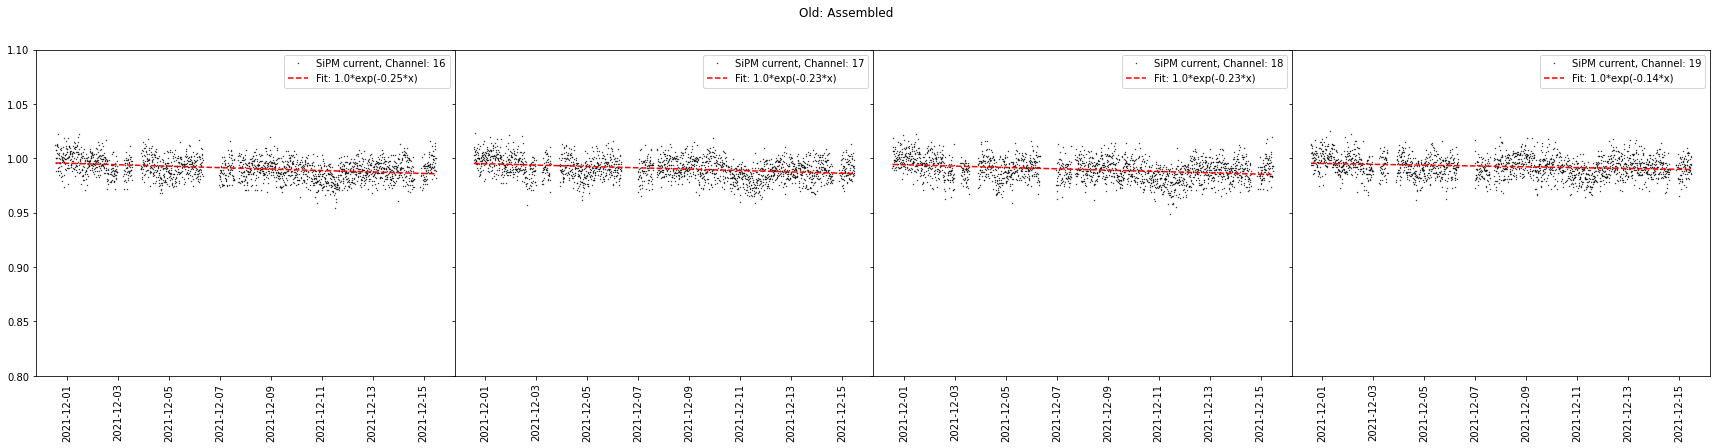

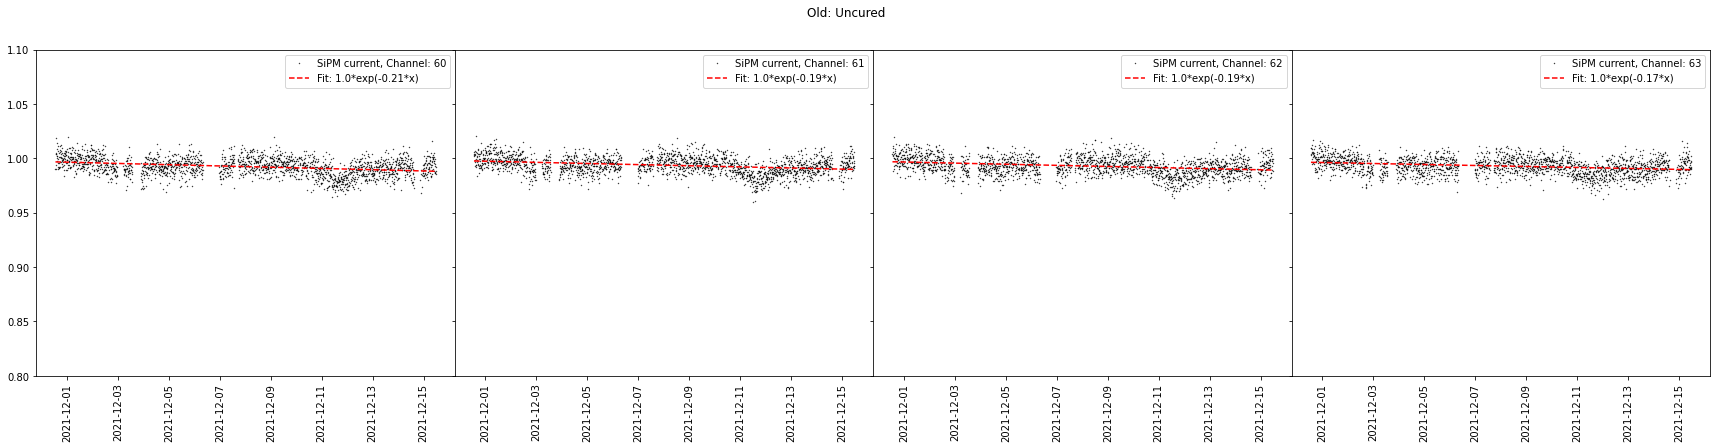

In [12]:
label = ''


for chan in it.chain(range(0, 12), range(16, 20), range(60,64)):
  if chan>=0 and chan<4:
    label='Fresh: Extrusions'
  if chan>=4 and chan<8:
    label='Fresh: Uncured'
  if chan>=8 and chan<12:
    label='Old: Extrusions'
  if chan>=16 and chan<20:
    label='Old: Assembled'
  if chan>=60 and chan<64:
    label='Old: Uncured'

    
  y = data_[chan]

  popt, pcov = curve_fit(expo, X, y, p0=(1, 0.05))

  if(chan%4==0):
    fig, axs = plt.subplots(1,4, figsize=(30, 6), sharey=True);
    fig.subplots_adjust(wspace=0)
  fig.suptitle(label)
  axs[chan%4].plot(data_.date, y, 'k.', label="SiPM current, Channel: %d"%chan, markersize=0.75);
  axs[chan%4].plot(data_.date, expo(X, *popt), 'r--', label="Fit: " + str(round(popt[0], 1)) + "*exp("+str(-1*round(popt[1],2))+"*x)"); #fits an exponential to the function
  axs[chan%4].legend()
  axs[chan%4].set_ylim(0.8,1.1);
  axs[chan%4].tick_params(axis='x', labelrotation = 90);

Text(0.5, 0, 'Temp [C]')

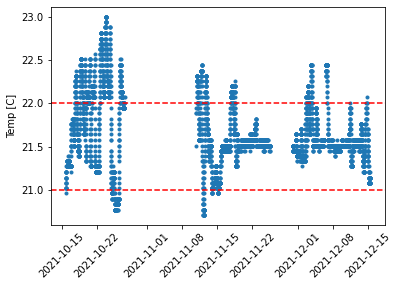

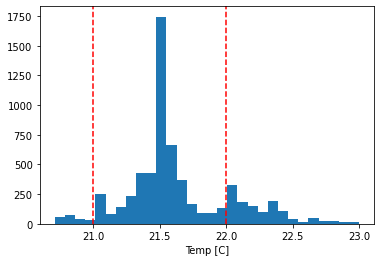

In [13]:
plt.plot(data.date, data.temp, '.', label='Temp [C]')
plt.axhline(y=MIN_TEMP, color='r', linestyle='--')
plt.axhline(y=MAX_TEMP, color='r', linestyle='--')
plt.xticks(rotation = 45);
plt.ylabel('Temp [C]')

plt.figure()
plt.hist(data.temp, bins=30, label='Temp [C]');
plt.axvline(x=MIN_TEMP, color='r', linestyle='--')
plt.axvline(x=MAX_TEMP, color='r', linestyle='--')
plt.xlabel('Temp [C]')

In [14]:
data.tail()

,date,source,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,temp,68,69,70,71,72
6281,2021-12-15 10:59:00,1,0.5892,0.6223,0.5477,0.5904,0.8097,0.8627,0.8184,0.8080,0.8343,0.8172,0.8202,0.7866,0.1917,0.1868,0.1800,0.1953,0.8822,0.8656,0.8069,0.8437,0.2213,0.2153,0.2051,0.2104,0.2432,0.2514,0.2641,0.2551,0.2788,0.2148,0.2167,0.2426,0.3428,0.2214,0.2024,0.2187,3.0728,0.3703,0.4167,0.4738,2.8638,0.4886,0.3992,0.4511,2.8719,0.6510,0.5497,0.6200,2.8616,0.6989,0.5825,0.6143,2.8593,0.5620,0.5711,0.6487,2.8703,0.3968,0.4208,0.4277,1.5413,1.6671,1.5886,1.5764,20.46,20.77,21.08,21.14,0.0,0.0,0.0,0.0,NaN
6282,2021-12-15 11:08:00,1,0.5911,0.6278,0.5416,0.5993,0.8058,0.8514,0.8001,0.8224,0.8310,0.8282,0.8201,0.7698,0.1887,0.1848,0.1808,0.1958,0.8866,0.8629,0.8124,0.8546,0.2200,0.2098,0.2046,0.2153,0.2473,0.2487,0.2644,0.2513,0.2791,0.2129,0.2223,0.2519,0.3410,0.2148,0.1971,0.2227,3.0728,0.3653,0.4257,0.4815,2.8638,0.4831,0.4028,0.4386,2.8720,0.6606,0.5586,0.6173,2.8616,0.6853,0.5743,0.6182,2.8593,0.5622,0.5664,0.6507,2.8703,0.3961,0.4250,0.4249,1.5235,1.6639,1.5814,1.5702,20.52,20.77,21.08,21.14,0.0,0.0,0.0,0.0,NaN
6283,2021-12-15 11:18:00,1,0.6072,0.6200,0.5498,0.5913,0.8025,0.8523,0.8167,0.8090,0.8393,0.8295,0.8307,0.7837,0.1921,0.1816,0.1861,0.2010,0.8629,0.8672,0.8140,0.8496,0.2157,0.2077,0.2047,0.2144,0.2463,0.2589,0.2642,0.2588,0.2676,0.2150,0.2183,0.2472,0.3446,0.2227,0.2024,0.2129,3.0728,0.3644,0.4220,0.4783,2.8636,0.4910,0.4040,0.4505,2.8720,0.6502,0.5458,0.6134,2.8616,0.6802,0.5766,0.6111,2.8595,0.5695,0.5779,0.6432,2.8703,0.3946,0.4202,0.4256,1.5221,1.6738,1.5816,1.5621,20.52,20.77,21.14,21.14,0.0,0.0,0.0,0.0,NaN
6284,2021-12-15 11:27:00,1,0.6003,0.6157,0.5409,0.5883,0.8132,0.8468,0.8001,0.8059,0.8302,0.8171,0.8240,0.7764,0.1922,0.1880,0.1812,0.1958,0.8680,0.8689,0.8108,0.8550,0.2186,0.2127,0.2084,0.2213,0.2530,0.2520,0.2715,0.2562,0.2762,0.2187,0.2177,0.2545,0.3229,0.2081,0.2050,0.2183,3.0728,0.3639,0.4248,0.4737,2.8636,0.4909,0.4082,0.4427,2.8721,0.6553,0.5571,0.6197,2.8617,0.6822,0.5946,0.6304,2.8593,0.5624,0.5771,0.6534,2.8704,0.3937,0.4304,0.4310,1.5306,1.6712,1.5761,1.5612,20.52,20.77,21.14,21.14,0.0,0.0,0.0,0.0,NaN
6285,2021-12-15 11:36:00,1,0.6005,0.6282,0.5328,0.5979,0.8117,0.8583,0.8146,0.8012,0.8284,0.8214,0.8282,0.7803,0.1951,0.1898,0.1800,0.1999,0.8764,0.8726,0.8136,0.8498,0.2193,0.2065,0.2053,0.2118,0.2496,0.2517,0.2599,0.2570,0.2733,0.2104,0.2164,0.2512,0.3572,0.2233,0.2025,0.2251,3.0727,0.3692,0.4146,0.4852,2.8638,0.4957,0.4140,0.4438,2.8719,0.6654,0.5694,0.6102,2.8615,0.6898,0.5752,0.6113,2.8593,0.5703,0.5844,0.6529,2.8703,0.3917,0.4158,0.4274,1.5259,1.6861,1.5659,1.5594,20.58,20.77,21.14,21.20,0.0,0.0,0.0,0.0,NaN
